<div style='background: #FF7B47; padding: 10px; border: thin solid darblue; border-radius: 5px; margin-bottom: 2vh'>
    
# Session 04 - Project Notebook


<div style='background: #FF7B47; padding: 10px; border: thin solid darblue; border-radius: 5px'>
     
## Overview 

In this lab, your goal is to learn how to acquire, parse, clean, analyze, and visualize data. Toward this goal, we will address certain question about COVID, and you will scrape data directly from a website. Since real-world problems often require gathering information from a variety of sources, including the Internet, web scraping is a highly useful skill to have. We then ask you to explore, analyze and clean the data before. We'll ask you to come up with some meaningful questions that you can 'ask the data'. Lastly, you will prodcude visualizations that help to identify trends and answer these questions.

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

## 1. Obtaining Data
    
For any given situation or scenario that we wish to understand, we will rely on having relevant data. Here, we are interested in the degree to which the SARS-CoV-2 virus has affected United States citizens (SARS-CoV-2 is the virus that causes the COVID-19 disease). The Centers for Disease Control and Prevention (CDC) provides relevant data from USAFacts.org that includes the number of confirmed COVID-19 cases on a per-county basis. Visit https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/. At the bottom of the web page, in a blue table, you should see a list of every state, each of which has its own web page.

In this exercise, we will focus on automating the downloading of each state's data (via Requests). First, as we will do for every Jupyter Notebook, let's import necessary packages that we will use throughout the notebook (i.e., run the cell below)
    


In [121]:
# import all potential libraries you might want to use..
import re
import csv
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from time import sleep
from bs4 import BeautifulSoup
%config InlineBackend.figure_formats = ['svg']

In [3]:
# we define this for convenience, as every state's url begins with this prefix
base_url = 'https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/'

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Exercise 1.1: Fetching Website data via Requests

Fetch the web page located at base_url and save the request's returned object (a Response object) to a variable named home_page.

In [4]:
# your code here
homePage = requests.get(base_url)

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Exercise 1.2:
Write a line of code that prints to the screen the status of home_page (the web page's returned object). You should receive a code of 200 if the request was successful; then,

Write code that prints the entire contents of home_page

In [5]:
# your code here
homePage.status_code

200

In [6]:
# your code here 
soup = BeautifulSoup(homePage.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title data-react-helmet="true">
   US COVID-19 cases and deaths by state | USAFacts
  </title>
  <meta content="IE=edge" data-react-helmet="true" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="width=device-width, initial-scale=1" data-react-helmet="true" name="viewport"/>
  <meta content="#E3007D" data-react-helmet="true" name="msapplication-TileColor"/>
  <meta content="#E3007D" data-react-helmet="true" name="theme-color"/>
  <meta content="coronavirus, covid-19, covid-cases, Cases and Deaths" data-react-helmet="true" name="keywords"/>
  <meta content="@usafacts" data-react-helmet="true" name="twitter:site"/>
  <meta content="US COVID-19 cases and deaths by state" data-react-helmet="true" name="twitter:title"/>
  <meta content="How is the nation faring against COVID-19, both overall and at a state level? Get the answers here, with data on hotspots and infection rates. This map tracks the hi

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Exercise 1.3:
In the cell below, create a new BeautifulSoup object that parses the home_page as an HTML document (can be done with 1 line of code)

In [7]:
# your code here

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Exercise 1.4:

In the cell below, write code that uses the BeautifulSoup object to parse through the home page in order to extract the the covid cases and deaths for each state. for every state. Feel free to use Regular Expressions, in conjunction with any BeautifulSoup parsing. Come up with a data structure or a set of data structures to store that information.

In [8]:
# your code here
tables = soup.find_all("table")
stateTable = tables[1]

stateList = stateTable.find_all("a")
dataList = stateTable.find_all("td", class_="MuiTableCell-root MuiTableCell-body MuiTableCell-alignRight MuiTableCell-sizeSmall")
caseList = []
deathList = []
for i, data in enumerate(dataList):
    if i % 6 == 3:
        caseList.append(data)
    elif i % 6 == 4:
        deathList.append(data)

with open("states_data.csv", "w") as file_write:
    writer = csv.writer(file_write)
    writer.writerow(["State", "Covid Cases", "Covid Deaths"])
    for i, state in enumerate(stateList):
        newCases = re.sub(",", '', caseList[i].text)
        writer.writerow([state.text, newCases, deathList[i].text])

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Exercise 1.5:

In the cell below, write code that uses the information scraped from the website/table and create at least two meaningful charts. Make sure to ask meaningful questions that your charts should answer. In case you want to perform some data wrangling to prepare the data for your visualizations, we've included some sample code how to sort a dictionary by values.

In [9]:
# sample code to sort a dictionary by values
markdict = {"Tom":67, "Tina": 54, "Akbar": 87, "Kane": 43, "Divya":73}
marklist = sorted(markdict.items(), key=lambda x:x[1]) # use 1 for sorting values
print(marklist)
sortdict = dict(marklist)
print(sortdict)

[('Kane', 43), ('Tina', 54), ('Tom', 67), ('Divya', 73), ('Akbar', 87)]
{'Kane': 43, 'Tina': 54, 'Tom': 67, 'Divya': 73, 'Akbar': 87}


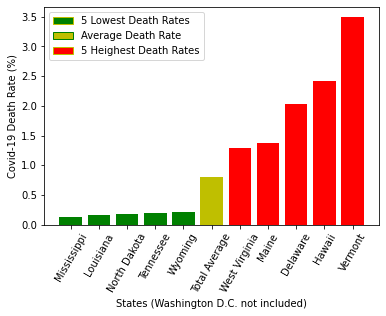

In [98]:
# your code here
import pandas as pd
import statistics as s
from matplotlib.patches import Patch
from matplotlib.transforms import Bbox

data = pd.read_csv("states_data.csv")

stateNames = data["State"]
cases = data["Covid Cases"]
deaths = data["Covid Deaths"]

deathRate = {}

for i, state in enumerate(stateNames):
    deathRate[state] = float(deaths[i]) / float(cases[i]) * 100

marklist = sorted(deathRate.items(), key=lambda x:x[1]) # use 1 for sorting values
sortdict = dict(marklist)

barXList = list(sortdict.keys())[0:5] + ["Total Average"] + list(sortdict.keys())[45:50]
barYList = list(sortdict.values())[0:5] + [s.mean(list(sortdict.values()))] + list(sortdict.values())[45:50]

colorList = ["g"] * 5 + ['y'] + ['r'] * 5
plt.bar(range(11), barYList, color = colorList)

legend_elements = [Patch(facecolor='g', edgecolor='y',label='5 Lowest Death Rates'), Patch(facecolor='y', edgecolor='g',label='Average Death Rate'), Patch(facecolor='r', edgecolor='y',label='5 Heighest Death Rates')]
plt.legend(handles=legend_elements, loc='upper left')

plt.xticks(range(11), barXList)
plt.tick_params(axis="x", labelrotation=60)

plt.xlabel('States (Washington D.C. not included)')
plt.ylabel('Covid-19 Death Rate (%)')

plt.savefig('Covid_Death_Rates.pdf', bbox_inches=Bbox([[0, -0.75], [5.75, 3.75]]))
plt.show()

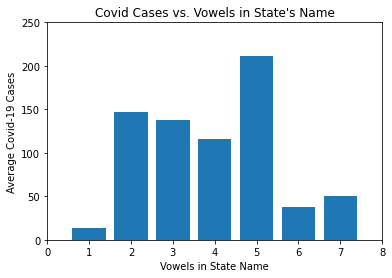

In [100]:
averageCases = [0] * 16

for vowelCount in range(0, 15):
    count = 0
    for i, state in enumerate(stateNames):
        if len(re.findall("[aeiou]", state)) == vowelCount:
            averageCases[vowelCount] += deaths[i]
            count += 1
    if count != 0:
        averageCases[vowelCount] /= count
        
plt.xlabel('Vowels in State Name')
plt.ylabel('Average Covid-19 Cases')

startx, endx = 0, 8
starty, endy = 0, 250
plt.axis([startx, endx, starty, endy])    
plt.title("Covid Cases vs. Vowels in State's Name")

plt.bar(range(16), averageCases)
plt.savefig('thing.pdf')


<BarContainer object of 16 artists>

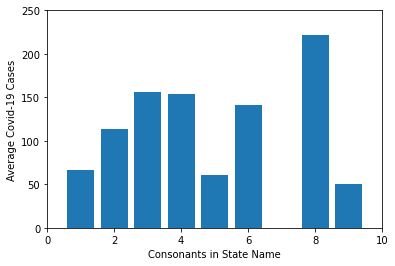

In [45]:
averageCases = [0] * 16

for consonantCount in range(0, 15):
    count = 0
    for i, state in enumerate(stateNames):
        if len(re.findall("[qwrtpsdfghjklzxcvbnm]", state)) == consonantCount:
            averageCases[consonantCount] += deaths[i]
            count += 1
    if count != 0:
        averageCases[consonantCount] /= count
        
plt.xlabel('Consonants in State Name')
plt.ylabel('Average Covid-19 Cases')

startx, endx = 0, 10
starty, endy = 0, 250
plt.axis([startx, endx, starty, endy])    

plt.bar(range(16), averageCases)

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Exercise 1.6:

In the cell below, write code that allows you to store all the state links from the main website into the state_urls dictionary (the links are bound to the state names in the table you were scraping earlier). Then, write a loop that scrapes all the counties in that state, as well as the 7-day average cases, 7-day average deaths, cases and deaths. For each state, print all that information into a csv file. Ultimately, you should have a csv file for each state.

In [83]:
state_urls = {}

data = pd.read_csv("states_data.csv")

stateNames = data["State"]

for state in stateNames:
    state_urls[state] = "https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/" + re.sub(" ", "-", state.lower())
    
    statePage = requests.get(state_urls[state])
    s = BeautifulSoup(statePage.content, "html.parser")
    
    tables = s.find_all("table")
    countyTable = tables[1]
    
    countyList = countyTable.find_all("a")
    dataList = countyTable.find_all("td", class_="MuiTableCell-root MuiTableCell-body MuiTableCell-alignRight MuiTableCell-sizeSmall")
    dayCaseList = []
    dayDeathList = []
    caseList = []
    deathList = []
    for i, data in enumerate(dataList):
        if i % 4 == 0:
            dayCaseList.append(data)
        elif i % 4 == 1:
            dayDeathList.append(data)
        elif i % 4 == 2:
            caseList.append(data)
        elif i % 4 == 3:
            deathList.append(data)
    
    with open(state + ".csv", "w") as file_write:
            writer = csv.writer(file_write)
            writer.writerow(["County", "7-Day Cases", "7-Day Deaths", "Total Cases", "Total Deaths"])
            for i, county in enumerate(countyList):
                newCases = re.sub(",", '', caseList[i].text)
                newDeaths = re.sub(",", '', deathList[i].text)
                writer.writerow([countyList[i].text, dayCaseList[i].text, dayDeathList[i].text, newCases, newDeaths])

print("done")

done


In [ ]:
# your code here

<div style='background: lightsalmon; padding: 10px; border: thin solid darblue; border-radius: 5px'>

### Exercise 1.7:

Lastly, write a function that has two parameters / takes two arguments: a string that should be the a county name, and another string that should be the path to a csv file containing all the counties of a particular state. The output of the function should be a grouped bar chart for all 4 measures. Each group should contain the value of the county as well as the average value of the state. 

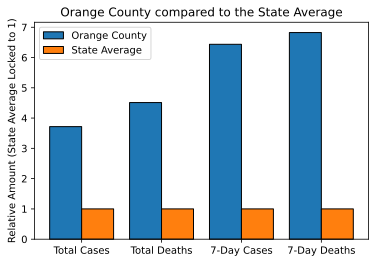

<Figure size 432x288 with 0 Axes>

In [122]:
#your code here
def compareCounty(countyName, stateCSV):
    data = pd.read_csv(stateCSV)

    X = ['Total Cases','Total Deaths','7-Day Cases','7-Day Deaths']
    countyData = data.loc[data["County"] == countyName]
    a = int(countyData[X[0]]) / data[X[0]].mean()
    b = int(countyData[X[1]]) / data[X[1]].mean()
    c = int(countyData[X[2]]) / data[X[2]].mean()
    d = int(countyData[X[3]]) / data[X[3]].mean()
    Ycounty = [a, b, c, d]
    Yaverage = [1, 1, 1, 1]

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.2, Ycounty, 0.4, label = countyName, edgecolor='black')
    plt.bar(X_axis + 0.2, Yaverage, 0.4, label = 'State Average', edgecolor='black')

    plt.xticks(X_axis, X)
    plt.ylabel('Relative Amount (State Average Locked to 1)')
    plt.title(countyName + " compared to the State Average")
    plt.legend()
    plt.show()
    
compareCounty("Orange County", "California.csv")
plt.savefig('Orange County.pdf')

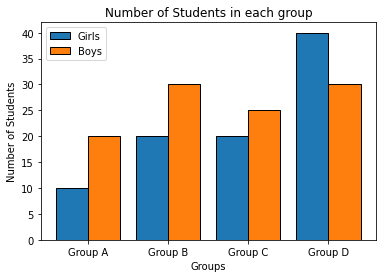

In [120]:
# example for grouped bar chart
  
X = ['Group A','Group B','Group C','Group D']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls', edgecolor='black')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys', edgecolor='black')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

<div style='background: #CBE0A4; padding: 10px; border: thin solid darblue; border-radius: 5px'>

## 2. Bonus

For the bonus, we'll up the game a little bit. In the folder 'data' there are three files containing county information about cases, deaths and population. (covid_confirmed_usafacts.csv, covid_deaths_usafacts.csv, covid_county_population_usafacts.csv)
Explore these files and then load them using pandas. 
    
Next, come up with some questions you could ask the data set and answer using some preprocessing & data wrangling and, ultimately, visualizations. Note that the data for cases and deaths has a temporal dimension. Try to make use of that information.
    
For this task, we highly encourage you to work with pandas. We will give you an advanced introduction to pandas in session 5 if time allows it (depending on how comfortable you feel today in session 4). To solve the bonus task during session 4, you will need to study the pandas documentation yourself. 

In [ ]:
data = pd.read_csv('data/covid_confirmed_usafacts.csv')
data
# sample code how to group by column
# data.groupby(by="whatever_you_want_to").sum()